Task 2: Load Data describe in detail their origin, content, structures and data types.

In [2]:
import pandas as pd
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
    sep=";"
)
print(df.describe(include='all'))
y = df['quality']

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

- **wine quality**

origin= archive.ics.uci.edu

        - UC Irvine, Maschine Learning Repository
        - has 683 datasets currently

content = 
- data length is 1599
- 12 kinds of features:
    - fixed acidity : 
            - min   4.60
            - max   15.9
            - mean  8.3
            - std   1.7
            -> huge differenz, but that might be an exception
            -> mostly around 8.3 with 1.7 deviation : 7-10
    - volatile acidity :
            - min   0.12
            - max   1.58
            - mean  0.527 ~ 0.53
            - std   0.179 ~ 0.18
    - citric acid :  
            - min   0.0
            - max   1.0
            - mean  0.27
            - std   0.19
    - residual sugar:
            - min   0.9
            - max   15.5
            - mean  2.538 ~ 2.54
            - std   1.40
  several features/themes related to the wine: chlorides, free sulfur dioxide, total sulfur dioxide, density, 
  pH, sulphates, alcohol, quality
- all have these subfeatures: count, mean, std, min, 25%,50%,75%,max
- categories focus on wine content, what its made of
structures = 
    - 3x4 columns
    - the subfeatures on the left side 
    - maybe categorized? 

data types =  only float numbers can be seen, except 1 int.

(visualize per graph?)

3.  Data Exploration: Prepare statistical and visual data summaries. 
    How many variables/features does the data contain, how many samples? Are there missing values? Explore correlations among variables and conduct at least one unsupervised analysis. Consider variable transformations and normalizations where applicable.


In [3]:
print("Missing Values in each column:")
print(df.isna().sum())
# 12 features/variables 
# no missing values
# all numerical, all float, 1 int (quality)
# 1599 samples/rows
print(df.info())

#Correlation neutral, positive, negative: df.corr()
#one unsupervised analysis
#variable transformations and normalizations where capable

Missing Values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    

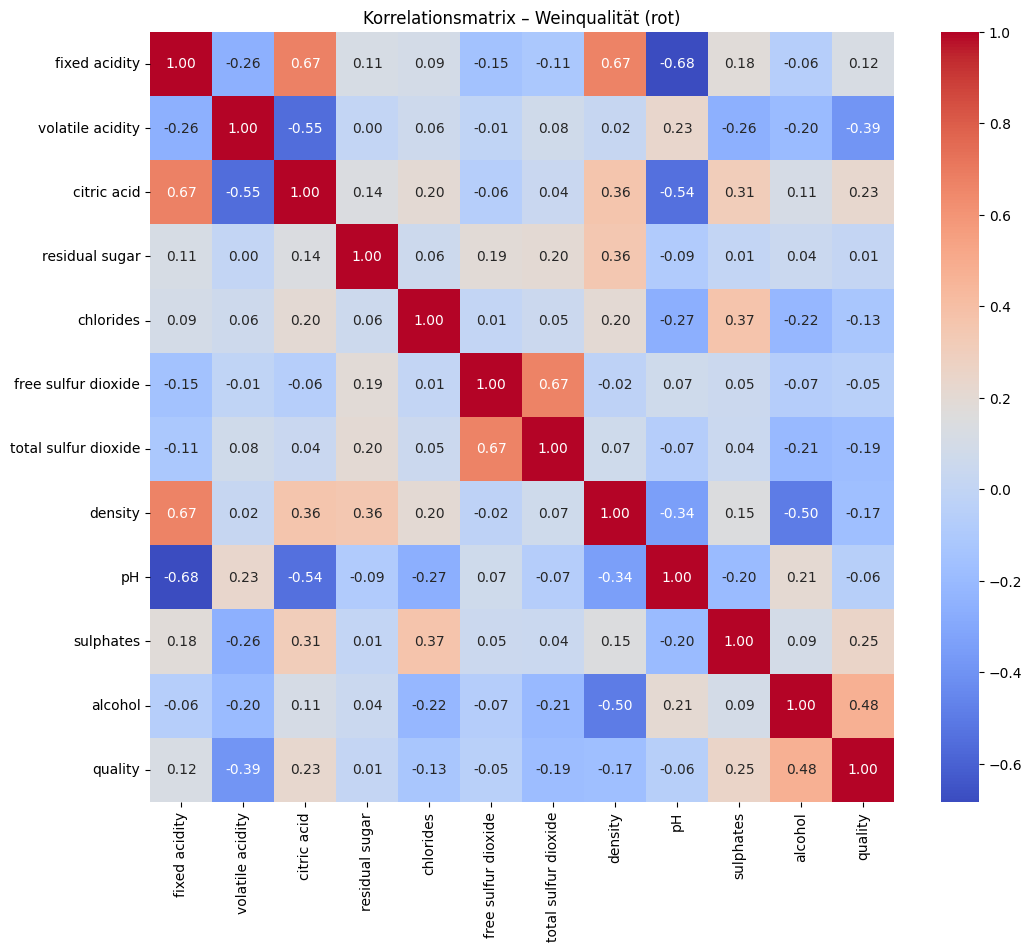

In [9]:
corr_matrix = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationsmatrix – Weinqualität (rot)")
plt.show()



In [ ]:
#je näher an 1, desto stärker die positive Korrelation
#je näher an -1, desto stärker die negative Korrelation
#je näher an 0, desto neutraler die Korrelation

In [10]:
corr_with_quality = corr_matrix["quality"].sort_values(ascending=False)
print(corr_with_quality)


quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64
